In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [10]:
data = pd.read_csv("E:\INNOMATICS\TASK 3\deliveries.csv")
data

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery
...,...,...,...
1363003,321684446,2024-01-31 23:58:08.494812502,Delivered
1363004,321684449,2024-02-01 00:00:46.000000000,Out For Delivery
1363005,321684448,2024-02-01 00:03:05.000000000,Out For Delivery
1363006,321684449,2024-02-01 00:14:56.997433391,Delivered


In [11]:
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

data['hour'] = data['time_stamp'].dt.hour

In [12]:
order_counts_per_hour = data.groupby('hour').size()
order_counts_per_hour

hour
0     28766
1     24291
2     22137
3     19901
4     18935
5     22389
6     33722
7     53472
8     68335
9     72995
10    74829
11    77582
12    81672
13    81418
14    82451
15    86095
16    88655
17    90900
18    79418
19    67107
20    58654
21    51001
22    42688
23    35595
dtype: int64

In [13]:
mu = order_counts_per_hour.mean()
poisson_dist = poisson(mu)

In [14]:
mu

56792.0

In [15]:
poisson_dist

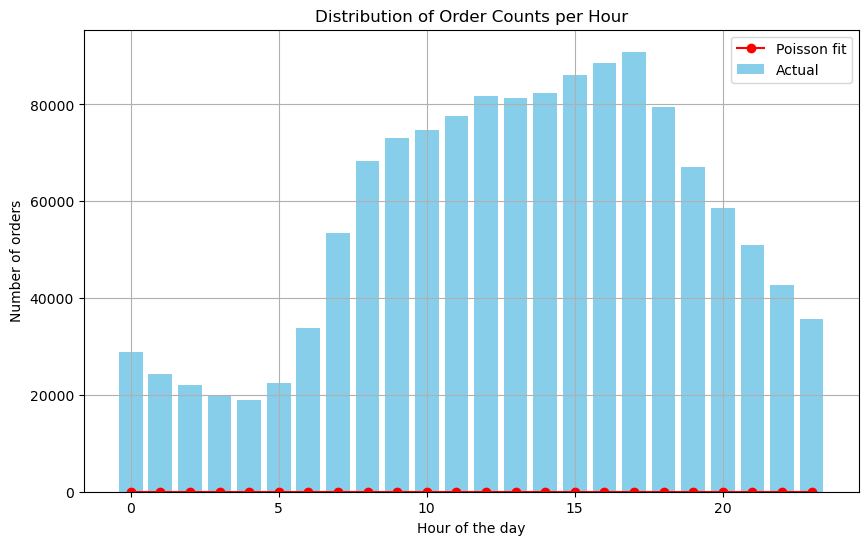

Average number of orders per hour: 56792.0


In [16]:
plt.figure(figsize=(10, 6))
plt.bar(order_counts_per_hour.index, order_counts_per_hour.values, color='skyblue', label='Actual')
plt.plot(order_counts_per_hour.index, poisson_dist.pmf(order_counts_per_hour.index), 'ro-', label='Poisson fit')
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.title('Distribution of Order Counts per Hour')
plt.legend()
plt.grid(True)
plt.show()

print(f"Average number of orders per hour: {mu}")